# ECON526: Midterm 2 Practice

## Student Name/Number: (doubleclick to edit)

This is an **ungraded** practice for editing and submitting the online
exam.

Note that many (not all) of the problems are (very) similar to homework
problems. The problems have been chosen to give you a sense of the types
of questions that will be asked, the general difficulty, and length. But
the actual exam will obviously be different. You should make sure that
you are comfortable with the material covered in the homeworks, the
lectures, and the readings.

### Instructions

-   Ensure you modify the field with your **name and student number
    above immediately**
-   **Execute the file** to begin, which will also check your setup. To
    do this in Jupyter, in the menu go `> Run > Run All Cells` or the
    equivalent buttons
-   Edit this file directly, and in-place as an `ipynb` file, which we
    will automatically download at the end of the exam time directly. -
    In particular
    -   **DO NOT** rename this file with your name. It is automatically
        associated with your canvas account
    -   **DO NOT** save-as the file, move it, or export to pdf or html
    -   **DO NOT** add any additional packages
-   **Save** the notebook as you are working.
    -   We will only grade what is saved at the end of the exam in this
        exact file, and it is your responsibility to ensure the file is
        saved
    -   We will **not** execute the notebook, so ensure all code,
        figures, etc. are ready as-is upon saving for submission
-   Ensure you **edit the results in the code blocks or markup blocks
    indicated** as we will not grade anything outside of those
    -   You will not be judged on code quality directly, but code
        clarity may be required for us to ensure you understood the
        problem directly
    -   If a question requires math, you can try to put latex inside of
        the cells but will not be judged on whether you write latex
        vs. math in text that doesn’t quite match latex. But it should
        be clear
-   The exam is **closed book** except for a **one page cheat-sheet**
    with anything on it.
-   Accessing the internet **is not permitted**, though feel free to use
    the internal help in Jupyter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import graphviz as gr

# Question 1

In class we analyzed the effect of online class formats on student
scores in a course. We found that the online format produced a negative
effect on scores.

The dataset is stored in `data/online_classroom.csv`. Read the data into
a pandas dataframe and print the head.

In [2]:
df = pd.read_csv("data/online_classroom.csv")
df.head()

## Q1.1

Estimate the average treatment effect (ATE) of the blended format, using
face-to-face as the control group. Use the **difference in sample
means** as your estimator. Print each sample average and your point
estimate of the ATE, along with the standard error of each mean and the
standard error of the ATE. Can you reasonably conclude (at the **90%
confidence level**) that the online format causes lower test scores than
the blended format? Explain in the markdown cell below.

In [3]:
df_f2f = df[df["format_ol"] == 0]
df_f2f = df_f2f[df_f2f["format_blended"] == 0]
df_blended = df[df["format_blended"] == 1]

# your code here

(double click to edit your answer)

## Q1.3

In class we noticed that there are not all that many observations in the
dataset. It also looks like the distribution of scores is not normal (in
fact, we know it’s not, since the score is bounded below at 0 and above
at 100). So we might be concerned that this, plus the limited amount of
data, means that our asymptotic standard errors are not very accurate.

Use bootstrapping to estimate the standard error of the ATE. You should
use 1000 bootstrap samples. Print the standard errors and the 90%
confidence interval for the ATE. How are the results different?

Is this what you expected? Does it seem like we have enough data for the
estimator to approach its asymptotic distribution? Explain in the
markdown cell below.

Hint: like before, start by splitting the data into treatment (online)
and control (blended) groups. Define a function that will resample the
dataframes. Then resample each group separately to maintain the right
proportion of treatment and control observations.

In [5]:
np.random.seed(100) # do not change this line

def sample_ate(df_1,df_2):
    # your code here
    return ate

estimates = [sample_ate(None,None) for _ in range(1000)] # replace None with your code, using pd.sample()

# now calculate the standard error and confidence interval

(double click to edit your answer)

# Question 2

Consider the following causal graph:

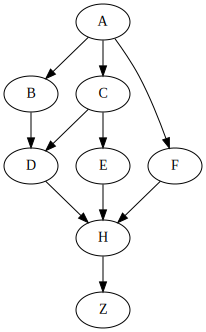

In [1]:
from graphviz import Digraph
g = Digraph()
g.edge('A', 'B')
g.edge('A', 'C')
g.edge('B', 'D')
g.edge('C', 'D')
g.edge('C', 'E')
g.edge('E', 'H')
g.edge('F', 'H')
g.edge('A', 'F')
g.edge('D', 'H')
g.edge('H', 'Z')

g

Evaluate each of the following statements as true or false. Explain why
your answer is correct.

## Q2.1

-   Answer the following questions as true or false, and explain:
    1.  $H \perp A$
    2.  $H \perp A \mid E$
    3.  $H \perp A \mid F$
    4.  $C \perp B \mid A$
    5.  $D \perp A \mid C$
    6.  $D \perp H$
    7.  $B \perp C \mid D$
    8.  $F \perp E \mid H$
    9.  $D \perp E \mid Z$

(double click to edit your answer)

## Q2.2

Suppose we are interested in finding the treatment effect of A on D. We
have data on all of the variables in the graph, and we want to use the
backdoor criterion to identify the causal effect. Which variables should
we condition on? Explain your answer.

(double click to edit your answer)

## Q2.3

Suppose we are interested in finding the treatment effect of A on H.
Which variables should we condition on? Explain your answer.

(double click to edit your answer)

## Q2.4

Suppose we are interested in finding the treatment effect of F on H. We
have data on A. Should we condition on A or C, or both? Explain your
answer.

(double click to edit your answer)

# Question 3

-   Suppose we had data on the following six variables:
    1.  $Yield$: the amount of corn produced by a farm
    2.  $Seeds$: the amount of seeds planted by the farm
    3.  $Rain$: the amount of rain that fell during the growing season
    4.  $Fertilizer$: the amount of fertilizer applied to the crop
    5.  $Equipment$: the investment value of equipment owned by the farm
    6.  $Subsidy$: the amount of government subsidy received by the farm
        to grow corn
    7.  $Demand$: the demand for corn

At the beginning of the season, the farmer measures demand, gets a
subsidy (which also depends on demand), and then uses this information
to choose how much to invest in seeds,equipment, and fertilizer, which
will be applied at the beginning of the season and eventually will
partially determine the yield at the end of the season. During the
season, rain falls exogenously on the corn and becomes the final factor
in how much corn is produced.

Assume that this is the true data generating process, and that we have
data on all of the variables.

## Q3.1

Use the graphviz library to draw a DAG that represents the causal
relationships between the variables in this example.

In [8]:
# your code here

## Q3.2

Are there any variables that we can remove in order to simplify this
model? If so, explain which ones and why.

(double click to edit your answer)

## Q3.3

Suppose we are interested in finding the effect of government subsidies
on crop yields. Which variables should we condition on? Explain your
answer.

(double click to edit your answer)

# Question 4

For this problem, we will use the data from Angrist and Kreuger (1991)
on the effect of education on earnings. The data is stored in
`data/ak91.csv`.

## Q4.1

Read in the data and print the head

In [10]:
# your code here

## Q4.2

Estimate the effect of education on earnings using OLS in `statsmodels`.
Print the results. Interpret the coefficient on education. Is it
statistically significant? What can we say about the causal effect of
education on earnings due to this regression? Explain in the markdown
cell below.

In [12]:
# your code here

(double click to edit your answer)

## Q4.3

Estimate the effect of education on earnings using IV regression and the
IV2SLS method from the linearmodels.iv package. Use just
`quarter_of_birth==4` as your instrument.

What is the actual causal effect of education on earnings? How is this
different than what we found before? Is it statistically significant?
Explain in the markdown cell below which of these results you would
prefer.

In [14]:
# your code here

(double click to edit your answer)